In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

In [2]:
df=pd.read_csv("zomato_hotels.csv")
df

,restaurant_name,location,price_for_2,din_rating,din_count,del_rating,del_count
0,Yaa Mohaideen Briyani,Pallavaram,500,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,1000,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,500,4.3,1361,4.4,10500
3,KFC,Perambur,500,4,1101,4,11200
4,Tasty Kitchen,Perambur,450,4.2,617,4.1,22400
...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,350,None,None,None,None
12028,CK's Sandwiches,Kolathur,350,None,None,None,None
12029,CK's Sandwiches,Anna Nagar East,350,None,None,None,None
12030,CK's Sandwiches,Ramapuram,350,None,None,None,None


In [3]:

df['din_rating'] = df['din_rating'].replace(['None'],'2.5')
df.din_rating.unique()

array(['4.3', '4.4', '4', '4.2', '4.1', '2.5', '3.9', '4.5', '4.7', '3.5',
       '4.6', '3.6', '3.8', '4.9', '4.8', '3.7', '2.7', '2.9', '2.6', '3',
       '3.4', '2.4', '3.3', '2.8', '2.1', '2', '2.2', '3.2', '3.1', '2.3',
       '1.9', '1.7', '0.3', '1'], dtype=object)

In [4]:

df['din_count'] = df['din_count'].replace(['Does not offer Dining'],'0')
df['din_count'] = df['din_count'].replace(['None'],'0')
df['din_count'] = df['din_count'].replace(['Not enough Dining Reviews'],'5000')
df.din_count.unique()


array(['1500', '3059', '1361', '1101', '617', '567', '0', '668', '2564',
       '1578', '743', '961', '982', '770', '1266', '1094', '1363', '742',
       '354', '660', '802', '578', '1992', '464', '782', '1180', '1139',
       '457', '625', '1030', '1118', '403', '602', '455', '350', '646',
       '429', '1085', '704', '712', '692', '601', '774', '1059', '409',
       '946', '559', '2162', '523', '908', '1082', '565', '2275', '1288',
       '2449', '835', '842', '1009', '1152', '2485', '731', '1516',
       '1135', '1078', '1225', '849', '768', '2252', '854', '1349',
       '1943', '460', '1262', '5407', '3042', '1096', '983', '771', '345',
       '585', '1027', '669', '1124', '1198', '515', '447', '920', '9410',
       '763', '741', '609', '979', '954', '1464', '794', '816', '780',
       '222', '697', '2994', '1498', '670', '611', '2109', '904', '516',
       '1611', '1258', '374', '509', '705', '764', '1485', '323', '459',
       '721', '653', '682', '2390', '652', '825', '593', '52

In [5]:
df['del_rating'] = df['del_rating'].replace(['None'],'2.5')
df.del_rating.unique()


array(['4.3', '4.1', '4.4', '4', '3.8', '4.2', '3.9', '3.6', '2.5', '3.3',
       '3.4', '3.7', '3.5', '4.5', '2.9', '4.6', '3.1', '2.7', '3.2', '3',
       '2.8', '2.3', '2.4', '4.7', '2.6', '2.2', '2.1', '2', '1.8', '1.6',
       '1.5', '0.3'], dtype=object)

In [6]:
df['del_count'] = df['del_count'].replace(['Does not offer Delivery'],'0')
df['del_count'] = df['del_count'].replace(['Not enough Delivery Reviews'],'2.5')
df['del_count'] = df['del_count'].replace(['None'],'0')
df.din_count.unique()


array(['1500', '3059', '1361', '1101', '617', '567', '0', '668', '2564',
       '1578', '743', '961', '982', '770', '1266', '1094', '1363', '742',
       '354', '660', '802', '578', '1992', '464', '782', '1180', '1139',
       '457', '625', '1030', '1118', '403', '602', '455', '350', '646',
       '429', '1085', '704', '712', '692', '601', '774', '1059', '409',
       '946', '559', '2162', '523', '908', '1082', '565', '2275', '1288',
       '2449', '835', '842', '1009', '1152', '2485', '731', '1516',
       '1135', '1078', '1225', '849', '768', '2252', '854', '1349',
       '1943', '460', '1262', '5407', '3042', '1096', '983', '771', '345',
       '585', '1027', '669', '1124', '1198', '515', '447', '920', '9410',
       '763', '741', '609', '979', '954', '1464', '794', '816', '780',
       '222', '697', '2994', '1498', '670', '611', '2109', '904', '516',
       '1611', '1258', '374', '509', '705', '764', '1485', '323', '459',
       '721', '653', '682', '2390', '652', '825', '593', '52

In [7]:
reg=linear_model.LinearRegression()
reg.fit(df[['din_count']],df.price_for_2)


LinearRegression()

In [8]:
reg.coef_


array([-0.02475652])

In [9]:
reg.intercept_


425.47963037635503

In [10]:
p=reg.predict([[2500]])
p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([363.58831841])

In [11]:
cnt=0
r1=p-50
r2=p+50
for x in df.price_for_2:
    if(x>r1 and x<r2):
        print(df.location[cnt])
    cnt=cnt+1


Navallur
Vadapalani
Mylapore
West Mambalam
Kolathur
Mogappair
Perambur
Royapettah
Kilpauk
Kilpauk
Valasaravakkam
Thousand Lights
Nungambakkam
Besant Nagar
Kilpauk
Nungambakkam
Royapuram
T. Nagar
Choolaimedu
Kodambakkam
Alwarpet
Velachery
Valasaravakkam
Perungudi
T. Nagar
Express Avenue Mall,Royapettah
Porur
Velachery
Shenoy Nagar
Medavakkam
Egmore
Gopalapuram
Anna Nagar East
Taramani
Mylapore
Anna Nagar East
Perungudi
Gopalapuram
Chetpet
Velachery
Avadi
Phoenix Market City, Velachery
Kilpauk
Nungambakkam
Medavakkam
Ashok Nagar
Besant Nagar
Thuraipakkam
K.K. Nagar
Velachery
Perungudi
Egmore
Anna Nagar East
Anna Nagar West
Aminijikarai
Kolathur
Porur
Anna Nagar West
Besant Nagar
Padur
Chromepet
Potheri
Kilpauk
Ekkaduthangal
Ashok Nagar
Anna Nagar West
Adyar
Ramapuram
Nungambakkam
Nungambakkam
Thuraipakkam
Karapakkam
Adyar
Kilpauk
Taramani
Kilpauk
Mylapore
Royapuram
Adyar
Perungudi
Mogappair
Choolaimedu
Kilpauk
Chetpet
Ambattur
Anna Nagar West
Vadapalani
Selaiyur
Thiruvanmiyur
T. Nagar
Ro

In [12]:
lat_val=[None]*268
lon_val=[None]*268
y=df.location.unique()
geolocator = Nominatim(user_agent="MyApp")
for i in range(21):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [13]:
for i in range(21,41):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [14]:
for i in range(41,61):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [15]:
for i in range(61,81):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [16]:
for i in range(81,101):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [17]:
for i in range(101,121):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [18]:
for i in range(121,141):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [19]:
for i in range(141,161):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [20]:
for i in range(161,181):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [21]:
for i in range(181,201):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [22]:
for i in range(201,221):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [23]:
for i in range(221,241):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [24]:
for i in range(241,251):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [25]:
for i in range(251,268):
        loc = geolocator.geocode(y[i])
        try:
            lat_val[i]=loc.latitude
        except:
            lat_val[i]=-1
print('success')

success


In [26]:
zone_div=[None]*268
for i in range(268):
    if lat_val[i]==-1:
        zone_div[i]='central'
    else:
        if (lat_val[i])<(13.04):
            zone_div[i]='south'
        else:
            zone_div[i]='north'
print(zone_div)

['south', 'south', 'north', 'north', 'south', 'south', 'north', 'south', 'south', 'south', 'south', 'north', 'central', 'north', 'south', 'central', 'central', 'north', 'south', 'south', 'south', 'south', 'north', 'north', 'south', 'north', 'north', 'south', 'north', 'north', 'south', 'south', 'north', 'south', 'south', 'north', 'south', 'south', 'south', 'south', 'south', 'north', 'north', 'central', 'north', 'north', 'central', 'north', 'south', 'south', 'central', 'central', 'north', 'central', 'south', 'north', 'south', 'north', 'south', 'central', 'central', 'central', 'south', 'central', 'south', 'south', 'central', 'central', 'central', 'central', 'north', 'central', 'south', 'central', 'central', 'south', 'central', 'south', 'north', 'south', 'central', 'north', 'south', 'central', 'north', 'central', 'south', 'central', 'south', 'south', 'south', 'central', 'central', 'south', 'south', 'north', 'south', 'north', 'north', 'central', 'central', 'south', 'central', 'north', 'cent

In [27]:
dictn={}
for i in range(268):
    dictn[y[i]]=zone_div[i]
print(dictn)

{'Pallavaram': 'south', 'Alandur': 'south', 'Kodambakkam': 'north', 'Perambur': 'north', 'Medavakkam': 'south', 'Navallur': 'south', 'Anna Nagar East': 'north', 'T. Nagar': 'south', 'Velachery': 'south', 'Vadapalani': 'south', 'Porur': 'south', 'Kilpauk': 'north', 'Purasavakkam': 'central', 'Ashok Nagar': 'north', 'Chetpet': 'south', 'Phoenix Market City, Velachery': 'central', 'Aminijikarai': 'central', 'Ramapuram': 'north', 'Mylapore': 'south', 'Thuraipakkam': 'south', 'RA Puram': 'south', 'Alwarpet': 'south', 'Mogappair': 'north', 'West Mambalam': 'north', 'Adyar': 'south', 'Nungambakkam': 'north', 'Royapettah': 'north', 'Chromepet': 'south', 'Kolathur': 'north', 'Valasaravakkam': 'north', 'Guindy': 'south', 'Potheri': 'south', 'Egmore': 'north', 'Madipakkam': 'south', 'Thiruvanmiyur': 'south', 'Saligramam': 'north', 'Sholinganallur': 'south', 'Perungudi': 'south', 'Besant Nagar': 'south', 'Kotturpuram': 'south', 'Semmancheri': 'south', 'Royapuram': 'north', 'Anna Nagar West': 'nort

In [28]:
zone=[None]*12032
for i in range(12032):
    zone[i]=dictn[df.location[i]]
print(zone)

['south', 'south', 'north', 'north', 'north', 'south', 'south', 'north', 'north', 'south', 'south', 'north', 'south', 'south', 'north', 'central', 'north', 'south', 'central', 'central', 'north', 'south', 'south', 'south', 'south', 'south', 'north', 'north', 'south', 'north', 'north', 'south', 'south', 'north', 'south', 'south', 'north', 'south', 'north', 'south', 'north', 'south', 'north', 'south', 'north', 'south', 'north', 'north', 'south', 'south', 'south', 'south', 'south', 'north', 'south', 'south', 'south', 'north', 'south', 'south', 'north', 'north', 'north', 'north', 'south', 'north', 'south', 'south', 'north', 'south', 'south', 'south', 'central', 'north', 'south', 'north', 'north', 'north', 'north', 'south', 'north', 'north', 'central', 'north', 'north', 'central', 'north', 'north', 'south', 'south', 'south', 'north', 'north', 'north', 'south', 'south', 'north', 'south', 'south', 'central', 'north', 'south', 'central', 'south', 'north', 'central', 'north', 'north', 'south', 

In [29]:
df['zone']=zone
df

,restaurant_name,location,price_for_2,din_rating,din_count,del_rating,del_count,zone
0,Yaa Mohaideen Briyani,Pallavaram,500,4.3,1500,4.3,9306,south
1,Sukkubhai Biriyani,Alandur,1000,4.4,3059,4.1,39200,south
2,SS Hyderabad Biryani,Kodambakkam,500,4.3,1361,4.4,10500,north
3,KFC,Perambur,500,4,1101,4,11200,north
4,Tasty Kitchen,Perambur,450,4.2,617,4.1,22400,north
...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,350,2.5,0,2.5,0,south
12028,CK's Sandwiches,Kolathur,350,2.5,0,2.5,0,north
12029,CK's Sandwiches,Anna Nagar East,350,2.5,0,2.5,0,north
12030,CK's Sandwiches,Ramapuram,350,2.5,0,2.5,0,north


In [30]:
price_norm=[None]*12032
p=df.price_for_2
for i in range(12032):
    if int(p[i])>0 and int(p[i])<=750:
        price_norm[i]=1
    if int(p[i])>750 and int(p[i])<=1500:
        price_norm[i]=2
    else:
        price_norm[i]=3
print('1=low price')
print('2=moderate price')
print('3=high price')

1=low price
2=moderate price
3=high price


In [31]:
din_count_norm=[None]*12032
q=df.din_count
for i in range(12032):
    if int(q[i])>0 and int(q[i])<=500:
        din_count_norm[i]=1
    if int(q[i])>501 and int(q[i])<=700:
        din_count_norm[i]=2
    else:
        din_count_norm[i]=3
print('1=low dining count')
print('2=moderate dining count')
print('3=high dining count')

1=low dining count
2=moderate dining count
3=high dining count


In [32]:
din_rating_norm=[None]*12032
r=df.din_rating
for i in range(12032):
    if float(r[i])>0 and float(r[i])<=3:
        din_rating_norm[i]=1
    if float(r[i])>3 and float(r[i])<4:
        din_rating_norm[i]=2
    else:
        din_rating_norm[i]=3
print('1=average customer opinion')
print('2=good customer opinion')
print('3=excellent customer opinion')

1=average customer opinion
2=good customer opinion
3=excellent customer opinion


In [33]:
df['price_class']=price_norm
df['din_count_class']=din_count_norm
df['rating_class']=din_rating_norm
df

,restaurant_name,location,price_for_2,din_rating,din_count,del_rating,del_count,zone,price_class,din_count_class,rating_class
0,Yaa Mohaideen Briyani,Pallavaram,500,4.3,1500,4.3,9306,south,3,3,3
1,Sukkubhai Biriyani,Alandur,1000,4.4,3059,4.1,39200,south,2,3,3
2,SS Hyderabad Biryani,Kodambakkam,500,4.3,1361,4.4,10500,north,3,3,3
3,KFC,Perambur,500,4,1101,4,11200,north,3,3,3
4,Tasty Kitchen,Perambur,450,4.2,617,4.1,22400,north,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,350,2.5,0,2.5,0,south,3,3,3
12028,CK's Sandwiches,Kolathur,350,2.5,0,2.5,0,north,3,3,3
12029,CK's Sandwiches,Anna Nagar East,350,2.5,0,2.5,0,north,3,3,3
12030,CK's Sandwiches,Ramapuram,350,2.5,0,2.5,0,north,3,3,3


In [34]:
inputs=df.drop(['restaurant_name','location','price_for_2','din_rating','din_count','del_count','zone','del_rating'],axis='columns')
inputs

,price_class,din_count_class,rating_class
0,3,3,3
1,2,3,3
2,3,3,3
3,3,3,3
4,3,2,3
...,...,...,...
12027,3,3,3
12028,3,3,3
12029,3,3,3
12030,3,3,3


In [35]:
target=df.zone
target

0        south
1        south
2        north
3        north
4        north
         ...  
12027    south
12028    north
12029    north
12030    north
12031    south
Name: zone, Length: 12032, dtype: object

In [36]:
# TRAIN-TEST SPLIT IN THE RATIO 0F TRAIN-70%,TEST-30%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

In [37]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [38]:
print('ENTER INPUTS AS THE FOLLOWING ORDER')
print('price_class,din_count_class,din_rating_count\n')

ENTER INPUTS AS THE FOLLOWING ORDER
price_class,din_count_class,din_rating_count



In [39]:
ip=[[2,2,1]]
bias=145

In [40]:
# MODEL-01 GAUSSIAN NAIVE BAYES
model_01=GaussianNB()
model_01.fit(X_train,y_train)
k1=model_01.score(X_test,y_test)
w1=k1*bias
op1=model_01.predict(ip)
bias=bias+10
print("THE ACCURACY OF NAIVE BAYES IS : ",w1)

THE ACCURACY OF NAIVE BAYES IS :  75.43213296398892


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [41]:
# MODEL-02 DECISION TREE
model_02=tree.DecisionTreeClassifier()
model_02.fit(X_train,y_train)
k2=model_02.score(X_test,y_test)
w2=k2*bias
op2=model_02.predict(ip)
bias=bias+10
print("THE ACCURACY OF DECISION TREE IS : ",w2)

THE ACCURACY OF DECISION TREE IS :  83.72576177285318


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
# MODEL-03 RANDOM FOREST
model_03=RandomForestClassifier()
model_03.fit(X_train,y_train)
k3=model_03.score(X_test,y_test)
w3=k3*bias
op3=model_03.predict(ip)
print("THE ACCURACY OF RANDOM FOREST IS : ",w3)

THE ACCURACY OF RANDOM FOREST IS :  89.12742382271468


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
#WEIGHTS DERVIVED FROM EACH MODEL
print("THE WEIGHT FROM NAIVE BAYES : W1=",w1)
print("THE WEIGHT FROM DECISION TREE : W2=",w2)
print("THE WEIGHT FROM RANDOM FOREST : W3=",w3)

THE WEIGHT FROM NAIVE BAYES : W1= 75.43213296398892
THE WEIGHT FROM DECISION TREE : W2= 83.72576177285318
THE WEIGHT FROM RANDOM FOREST : W3= 89.12742382271468


In [44]:
#WEIGHTED AVERAGE CALCULATION AND OUPUT PREDICTION
weight_map={"south":0,"central":0,"north":0}
freq_map={"south":0,"central":0,"north":0}
freq_map[op1[0]]=freq_map[op1[0]]+1
freq_map[op2[0]]=freq_map[op2[0]]+1
freq_map[op3[0]]=freq_map[op3[0]]+1

weight_map[op1[0]]=weight_map[op1[0]]+w1;
weight_map[op2[0]]=weight_map[op2[0]]+w2;
weight_map[op3[0]]=weight_map[op3[0]]+w3;

for key in weight_map:
    if freq_map[key] != 0:
        weight_map[key] = weight_map[key] / freq_map[key]
op=""
n=-1
for key in weight_map:
    if weight_map[key]>n:
        op=key
        n=weight_map[key]
weight_map

{'south': 86.42659279778393, 'central': 75.43213296398892, 'north': 0}

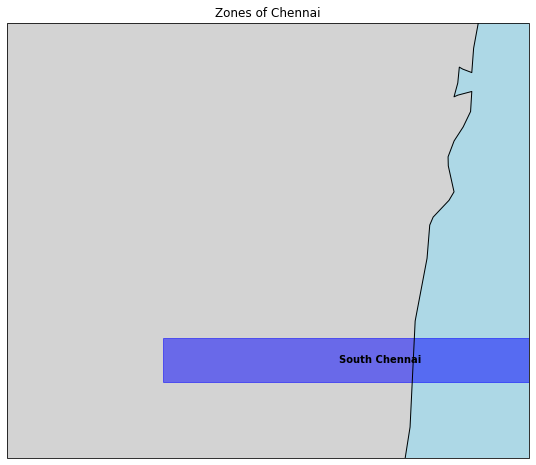

You can establish your hotel in SOUTH zone of Chennai, which suits your specifications!


In [45]:
north_chennai = (13.1467, 80.2670)
central_chennai = (13.0836, 80.2707)
south_chennai = (12.9124, 80.2291)


plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([79.8, 80.4, 12.8, 13.3])  # Set the extent to focus on Chennai

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')

zone_width = 0.5  

north_rect = Rectangle((north_chennai[1] - zone_width/2, north_chennai[0] - 0.025), zone_width, 0.05, color='red', alpha=0.5)
central_rect = Rectangle((central_chennai[1] - zone_width/2, central_chennai[0] - 0.025), zone_width, 0.05, color='green', alpha=0.5)
south_rect = Rectangle((south_chennai[1] - zone_width/2, south_chennai[0] - 0.025), zone_width, 0.05, color='blue', alpha=0.5)


if 'North'.upper() in op.upper():
    ax.add_patch(north_rect)
    plt.text(north_chennai[1], north_chennai[0], 'North Chennai', horizontalalignment='center', verticalalignment='center', weight='bold')
if 'Central'.upper() in op.upper():
    ax.add_patch(central_rect)
    plt.text(central_chennai[1], central_chennai[0], 'Central Chennai', horizontalalignment='center', verticalalignment='center', weight='bold')
if 'South'.upper() in op.upper():
    ax.add_patch(south_rect)
    plt.text(south_chennai[1], south_chennai[0], 'South Chennai', horizontalalignment='center', verticalalignment='center', weight='bold')


plt.title('Zones of Chennai')

plt.show()
print('You can establish your hotel in '+op.upper()+' zone of Chennai, which suits your specifications!')